11493376/11490434 [==============================] - 2s 0us/step


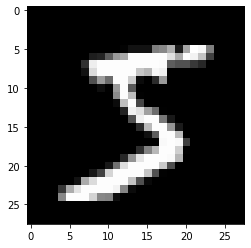

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

plt.imshow(X_train[0], cmap="gray")

In [5]:
# Scale features
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [53]:
# Build autoencoder
encoder_input = keras.Input(shape=(28,28,1), name="img")
flatten = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(flatten)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.compile(opt, loss="mse")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_26 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [54]:
# fit autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0274 - val_loss: 0.0109
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0099 - val_loss: 0.0095


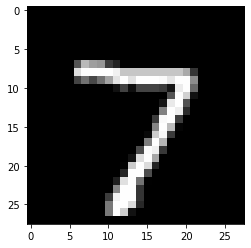

In [55]:
# test example
test_image = X_test_scaled[0]
plt.imshow(test_image, cmap="gray")

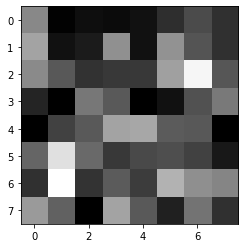

In [58]:
# test encoding
encoded_example = encoder.predict([test_image.reshape(-1, 28, 28, 1)])[0]
plt.imshow(encoded_example.reshape(8,8), cmap="gray")

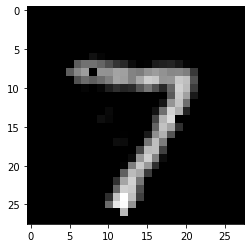

In [59]:
# test encoded & decoded
ae_out = autoencoder.predict([test_image.reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap="gray")

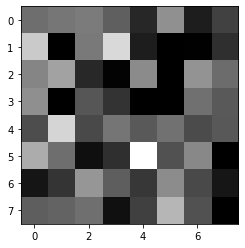

In [60]:
import random


def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

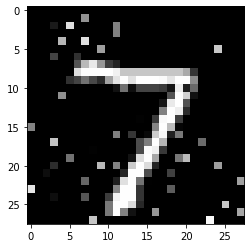

In [66]:
example_noisy = add_noise(X_test_scaled[0], random_chance=5)
plt.imshow(example_noisy, cmap="gray")

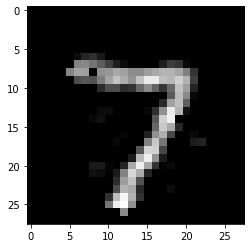

In [72]:
ae_out = autoencoder.predict([example_noisy.reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap="gray")